In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
#initializing pca
from sklearn import decomposition
from feature_selector import FeatureSelector

In [2]:
features_nor_path = 'E:\Analysis-on-GAN\dataset\Dataset_normal.csv'
features_ran_path = 'E:\Analysis-on-GAN\dataset\Dataset_ransom.csv'

# apply supervised feature reduction algorithms on dataset
features_ran_data = pd.read_csv(features_ran_path, header = None)
features_nor_data = pd.read_csv(features_nor_path, header = None)

# delete the first column name row
features_ran_data = features_ran_data[1:]
features_nor_data = features_nor_data[1:]

features_ran_data['label'] = [1]*len(features_ran_data)
features_nor_data['label'] = [0]*len(features_nor_data)

features_ran_data

,0,1,2,3,4,5,6,7,8,9,...,122258,122259,122260,122261,122262,122263,122264,122265,122266,label
1,0,label,Un known,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,label,Un known,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,label,Un known,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,label,Un known,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5,0,label,Un known,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,0,label,Un known,1,0,1,1,0,1,1,...,0,0,1,0,0,0,0,0,0,1
188,0,label,Un known,1,0,1,1,0,1,1,...,0,0,1,0,0,0,0,0,0,1
189,0,label,Un known,1,0,1,1,0,1,1,...,0,0,1,0,0,0,0,0,0,1
190,0,label,Un known,1,0,1,1,0,1,1,...,0,0,1,0,0,0,0,0,0,1


In [3]:
features_nor_data

,0,1,2,3,4,5,6,7,8,9,...,122258,122259,122260,122261,122262,122263,122264,122265,122266,label
1,0,label,Un known,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,label,Un known,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,label,Un known,1,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,label,Un known,1,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,label,Un known,1,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0,label,Un known,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,0
139,0,label,Un known,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,0
140,0,label,Un known,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
141,0,label,Un known,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


In [4]:
features_data = features_ran_data.append(features_nor_data, ignore_index=True)
features_data

,0,1,2,3,4,5,6,7,8,9,...,122258,122259,122260,122261,122262,122263,122264,122265,122266,label
0,0,label,Un known,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,label,Un known,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,label,Un known,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,label,Un known,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,label,Un known,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0,label,Un known,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,0
329,0,label,Un known,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,0
330,0,label,Un known,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
331,0,label,Un known,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


In [5]:
features_data.iloc[:,3:-1]

,3,4,5,6,7,8,9,10,11,12,...,122257,122258,122259,122260,122261,122262,122263,122264,122265,122266
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,0,1
329,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,0,1
330,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
331,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1


In [6]:
# features = features_data.iloc[1:,3:].values
features_data.to_csv('Dataset.csv', index=False)
features_data.to_csv('Dataset.csv', header=None)

In [7]:
features_data.shape

(333, 122268)

In [8]:
# create the X, Y matrixes
X, y = features_data.iloc[:,3:-1].values, features_data['label'].values
X.shape

(333, 122264)

In [9]:
pca = decomposition.PCA()
# the min value in (sample, features)
pca.n_components=333
pcadata = pca.fit_transform(X)

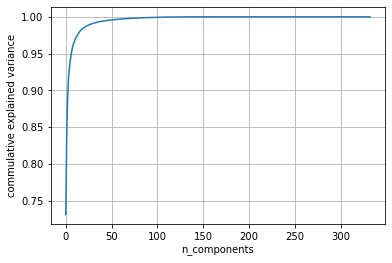

In [10]:
perc_var_explain=pca.explained_variance_/np.sum(pca.explained_variance_)

cumulative_var_explain=np.cumsum(perc_var_explain)
plt.plot(cumulative_var_explain)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('cumulative explained variance')
plt.show()

In [11]:
cummulative_var_explain.shape

(333,)

In [12]:
pca.components_

array([[ 8.74894197e-04,  3.77220229e-03,  1.43181693e-04, ...,
         3.59902200e-03,  1.63461923e-04,  3.21194128e-03],
       [ 1.05632797e-03,  3.19212131e-03,  1.10992928e-04, ...,
        -3.18478321e-04, -4.49027404e-04, -2.42538074e-03],
       [ 9.89441501e-04,  9.04629657e-04, -4.43120459e-05, ...,
        -3.11969573e-03,  5.91590622e-04, -2.03824693e-03],
       ...,
       [ 8.04688002e-03,  3.44060786e-03, -6.03037745e-03, ...,
         1.45964953e-16, -2.63634770e-16, -6.88738076e-06],
       [-9.61596438e-03,  2.68941113e-02,  1.18817274e-02, ...,
        -3.30708768e-16,  6.35634699e-16,  1.46516705e-05],
       [-2.50504511e-02, -6.10707825e-03, -1.37083192e-02, ...,
        -5.90998604e-16,  7.46320730e-16,  1.65553290e-05]])

In [13]:
# number of components
n_pcs= pca.components_.shape[0]
n_pcs

333

In [14]:
from collections import Counter
# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]


In [15]:
# most_important_value = [pca.components_[i].max() for i in range(n_pcs)]
# mean_value = np.mean(most_important_value)
# most_important_values = [most_important_value > mean_value]
# most_important_values

In [16]:
initial_feature_names = [x for x in range(3, 122266)]

# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# using LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

In [17]:
# build the dataframe
df = pd.DataFrame(sorted(dic.items()))
df

,0,1
0,PC1,10798
1,PC10,25017
2,PC100,11150
3,PC101,10825
4,PC102,11865
...,...,...
328,PC95,9080
329,PC96,19949
330,PC97,56802
331,PC98,10861


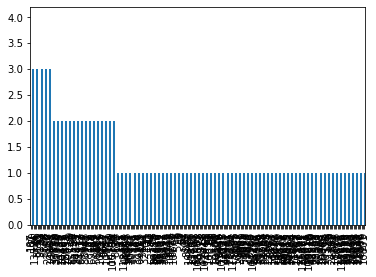

In [18]:
df[1].value_counts().plot.bar()

In [19]:
Counter(df[1].value_counts()>2)

Counter({True: 16, False: 236})

In [20]:
idx = [x[0] for x in np.where(cumulative_var_explain>=0.99)]
idx

[28]

In [21]:
idx = [x[0] for x in np.where(cumulative_var_explain>=0.999)]
idx

[91]

In [22]:
idx = [x[0] for x in np.where(cumulative_var_explain>=0.9999)]
idx

[128]